## zad.1
W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)

In [1]:
library("tidyverse")
library("ggplot2")
library("shiny")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.1.1       <U+221A> purrr   0.3.2  
<U+221A> tibble  2.1.1       <U+221A> dplyr   0.8.0.1
<U+221A> tidyr   0.8.3       <U+221A> stringr 1.4.0  
<U+221A> readr   1.3.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
data <- read.csv("data.csv") %>% filter(method != "better")
data

n,method,time
100,naive,0.02
100,blas,0.00
100,naive,0.01
100,blas,0.00
100,naive,0.01
100,blas,0.00
100,naive,0.02
100,blas,0.00
100,naive,0.01
100,blas,0.00


## zad.2
Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)

In [3]:
avg_data <- aggregate(time ~ n:method, data=data, FUN=mean)
avg_data

n,method,time
100,blas,0.001
200,blas,0.008
300,blas,0.029
400,blas,0.069
500,blas,0.134
600,blas,0.237
700,blas,0.387
800,blas,0.614
900,blas,0.945
1000,blas,1.337


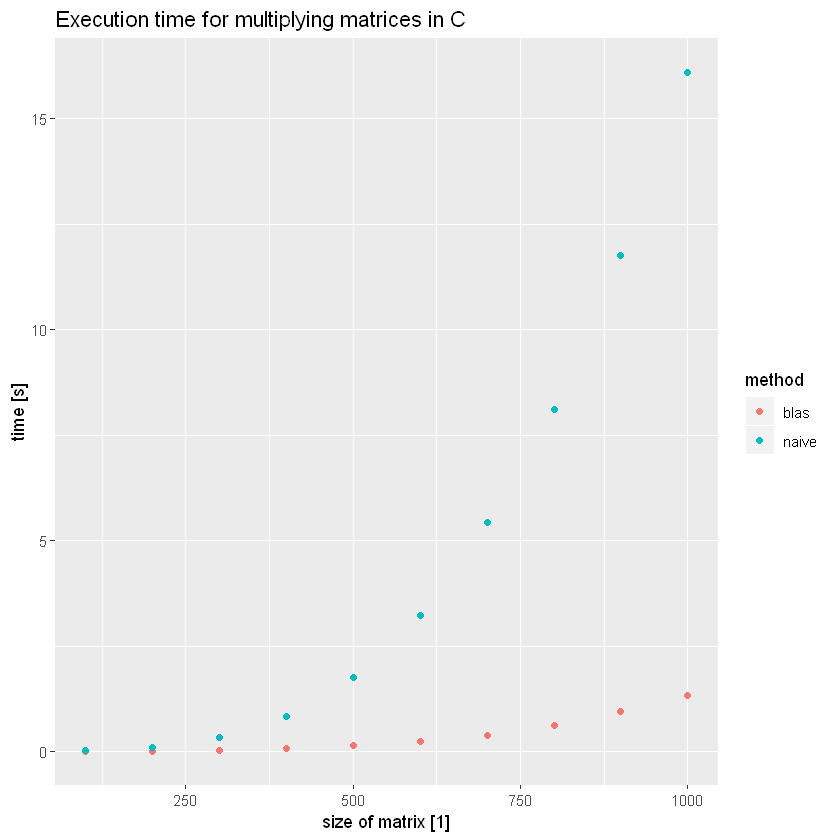

In [4]:
plot <- ggplot(avg_data, aes(x=n, y=time, color=method)) + geom_point() + xlab("size of matrix [1]") + ylab("time [s]") + ggtitle("Execution time for multiplying matrices in C")
plot

## zad.3
Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2

In [5]:
avg_data$time_sd <- aggregate(time ~ n:method, data=data, FUN="sd")$time
avg_data

n,method,time,time_sd
100,blas,0.001,0.003162278
200,blas,0.008,0.004216370
300,blas,0.029,0.003162278
400,blas,0.069,0.003162278
500,blas,0.134,0.005163978
600,blas,0.237,0.004830459
700,blas,0.387,0.006749486
800,blas,0.614,0.005163978
900,blas,0.945,0.011785113
1000,blas,1.337,0.011595018


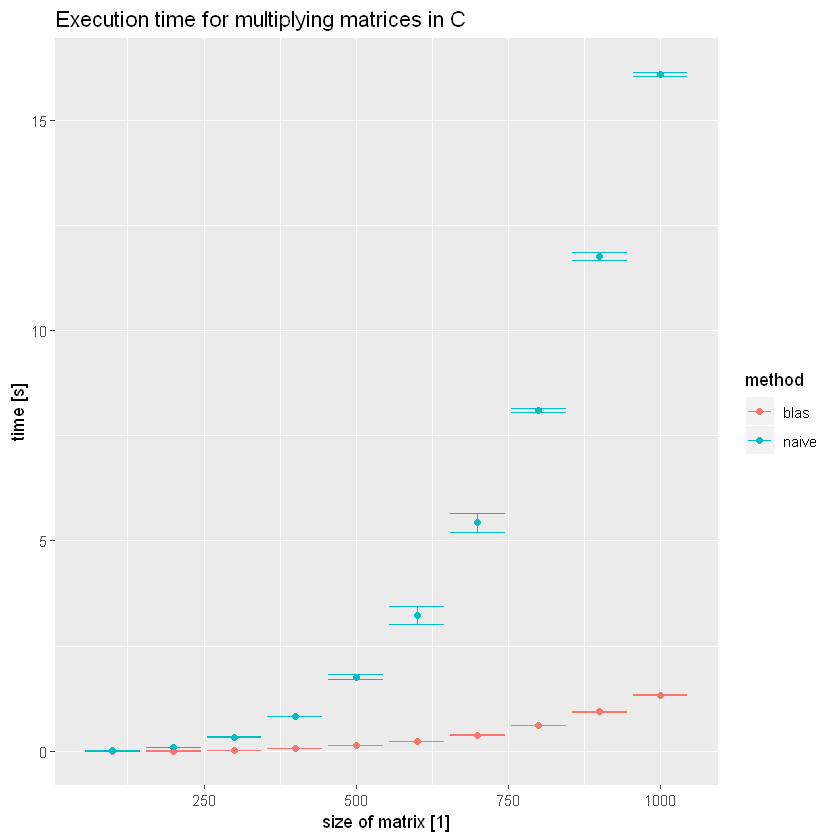

In [6]:
plot <- ggplot(avg_data, aes(x=n, y=time, color=method)) + geom_point() + xlab("size of matrix [1]") + ylab("time [s]") + ggtitle("Execution time for multiplying matrices in C")
plot <- plot + geom_errorbar(aes(ymin = time - time_sd, ymax = time + time_sd))
plot

## zad.4
Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu

In [7]:
bavg_data <- avg_data %>% filter(method == "blas")
navg_data <- avg_data %>% filter(method == "naive")

In [8]:
fit_b <- lm(time ~ poly(n, 2, raw=TRUE), data=bavg_data)
fit_n <- lm(time ~ poly(n, 3, raw=TRUE), data=navg_data)

In [9]:
b_points <- data.frame(n = seq(100, 1000, 1))
n_points <- data.frame(n = seq(100, 1000, 1))

In [10]:
b_points$time <- predict(fit_b, b_points)
n_points$time <- predict(fit_n, n_points)

In [11]:
b_points$method <- rep("blas", 901);
n_points$method <- rep("naive", 901);

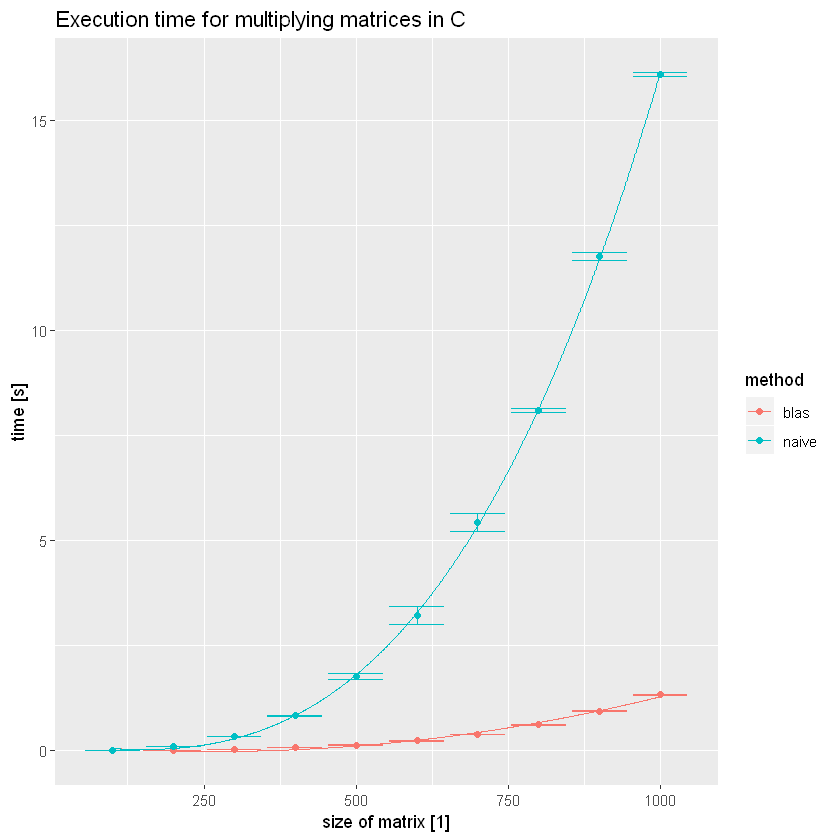

In [12]:
plot <- plot + geom_line(data=b_points, aes(x = n, y = time)) + geom_line(data=n_points, aes(x = n, y = time))
plot

## zad.5
Dopasować **krzywą wykładniczą** do liczby zakażonych koronawirusem w Polsce. Przykładowe źródło danych https://ourworldindata.org/explorers/coronavirus-data-explorer. Dla każdej fali dopasować osobną krzywą (dane i aproksymacje pokazać na wykresach); porównać ich parametry krzywych.

In [13]:
total <- read.csv("total.csv")
total

day,location,date,total_cases
1,Poland,2020-03-04,1
2,Poland,2020-03-05,1
3,Poland,2020-03-06,5
4,Poland,2020-03-07,5
5,Poland,2020-03-08,11
6,Poland,2020-03-09,16
7,Poland,2020-03-10,22
8,Poland,2020-03-11,31
9,Poland,2020-03-12,49
10,Poland,2020-03-13,68


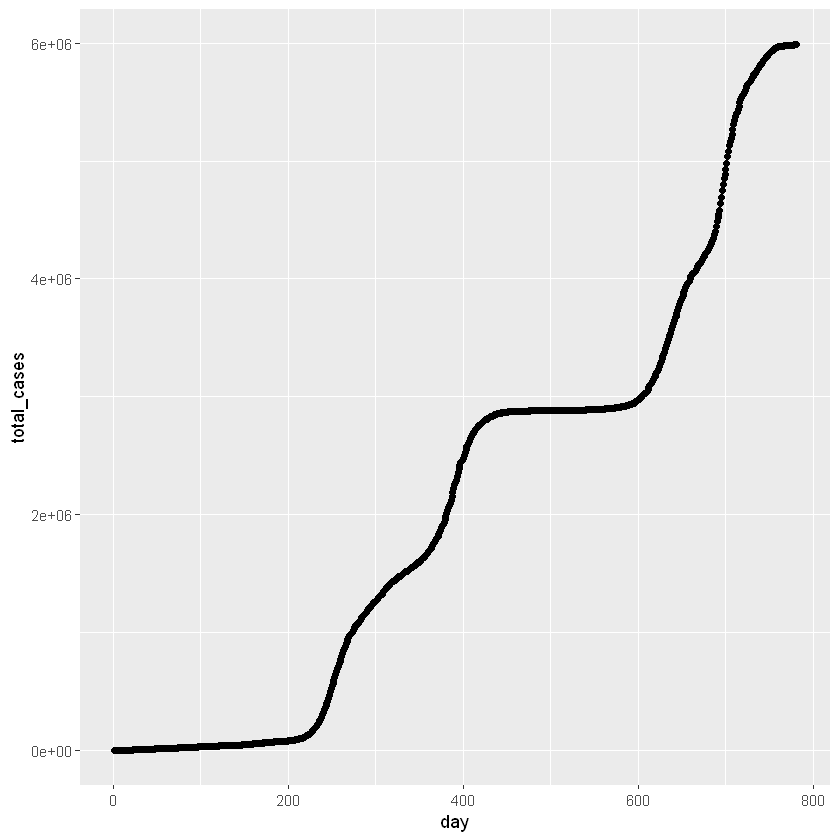

In [14]:
plot <- ggplot(total, aes(x = day, y = total_cases)) + geom_point()
plot

In [15]:
data <- read.csv("covid.csv")
data

day,location,date,new_cases
1,Poland,2020-03-04,1
2,Poland,2020-03-05,0
3,Poland,2020-03-06,4
4,Poland,2020-03-07,0
5,Poland,2020-03-08,6
6,Poland,2020-03-09,5
7,Poland,2020-03-10,6
8,Poland,2020-03-11,9
9,Poland,2020-03-12,18
10,Poland,2020-03-13,19


In [16]:
wave_1 <- data %>% filter(day < 32) %>% filter(new_cases != 0)
wave_1

day,location,date,new_cases
1,Poland,2020-03-04,1
3,Poland,2020-03-06,4
5,Poland,2020-03-08,6
6,Poland,2020-03-09,5
7,Poland,2020-03-10,6
8,Poland,2020-03-11,9
9,Poland,2020-03-12,18
10,Poland,2020-03-13,19
11,Poland,2020-03-14,35
12,Poland,2020-03-15,16


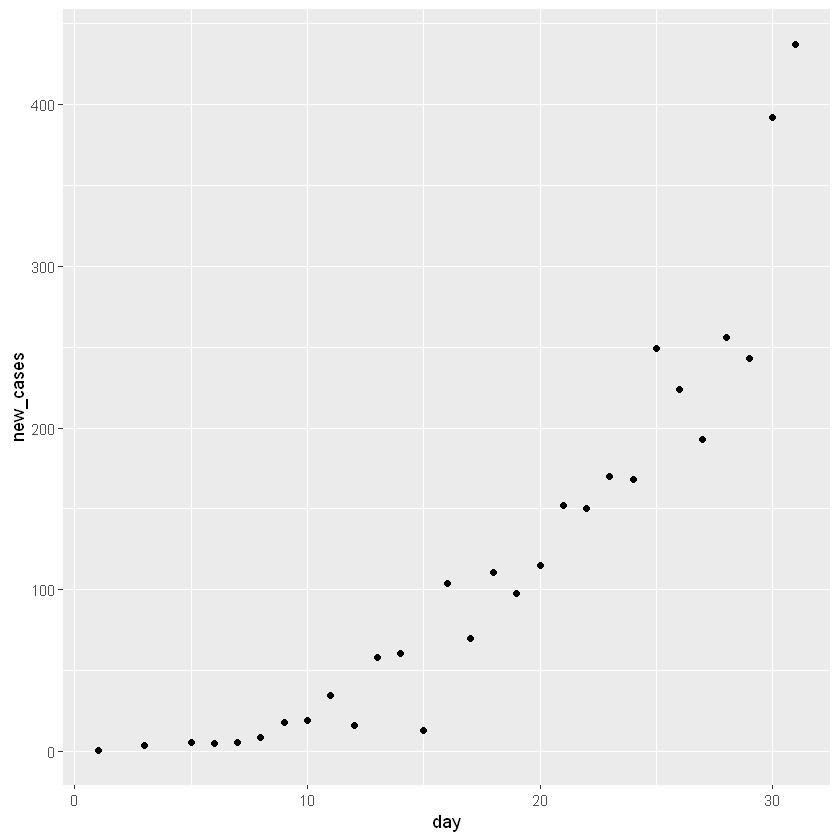

In [17]:
plot_w1 <- ggplot(wave_1, aes(x = day, y = new_cases)) + geom_point()
plot_w1

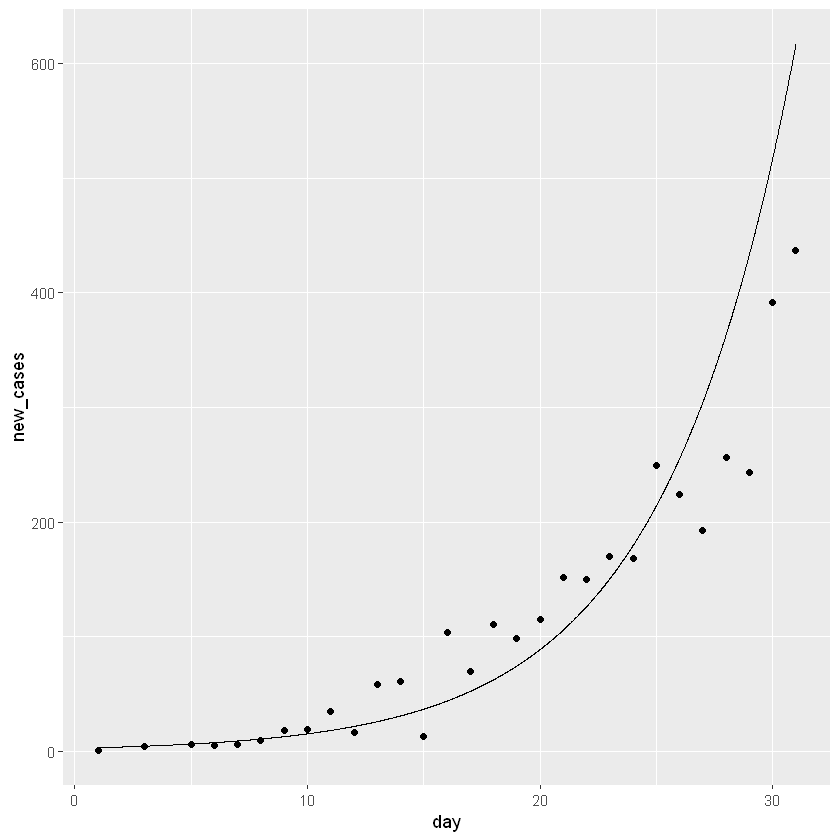

In [18]:
fit <- lm(log(new_cases) ~ day, data=wave_1)
sample <- data.frame(day = seq(1, 31, 0.01))
sample$new_cases <- predict(fit, sample)
plot_w1 <- plot_w1 + geom_line(data=sample, aes(day, exp(new_cases)))
plot_w1

In [19]:
wave_2 <- data %>% filter(day > 195) %>% filter(day < 248)
wave_2$day <- wave_2$day - 195
wave_2

day,location,date,new_cases
1,Poland,2020-09-15,605
2,Poland,2020-09-16,600
3,Poland,2020-09-17,837
4,Poland,2020-09-18,757
5,Poland,2020-09-19,1002
6,Poland,2020-09-20,910
7,Poland,2020-09-21,748
8,Poland,2020-09-22,711
9,Poland,2020-09-23,974
10,Poland,2020-09-24,1136


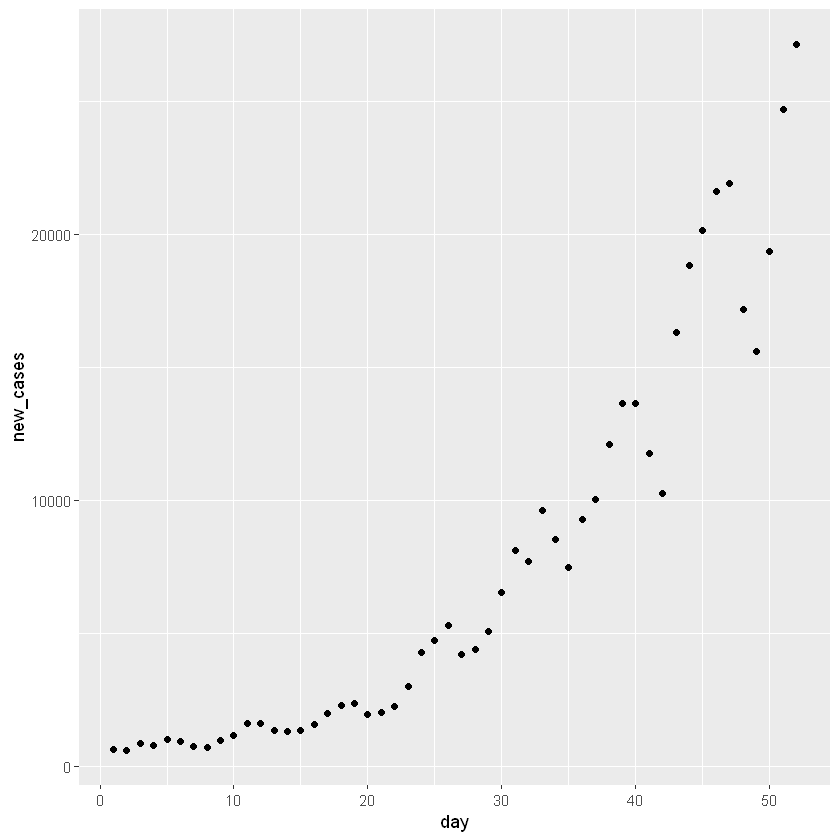

In [20]:
plot_w2 <- ggplot(wave_2, aes(x = day, y = new_cases)) + geom_point()
plot_w2

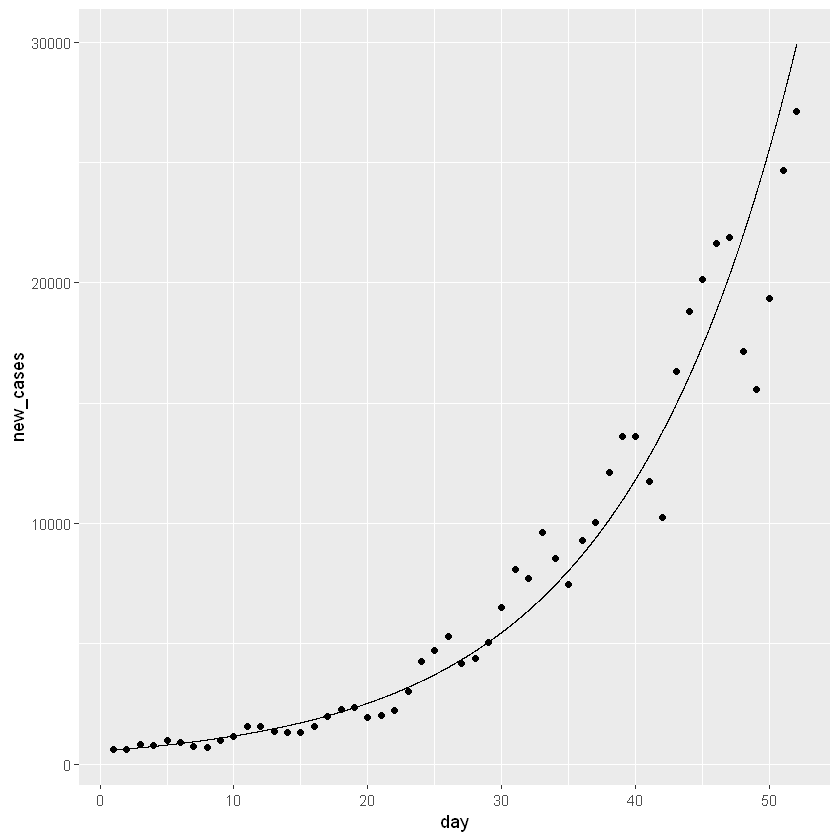

In [21]:
fit <- lm(log(new_cases) ~ day, data=wave_2)
sample <- data.frame(day = seq(1, 52, 0.01))
sample$new_cases <- predict(fit, sample)
plot_w2 <- plot_w2 + geom_line(data=sample, aes(day, exp(new_cases)))
plot_w2

In [22]:
wave_3 <- data %>% filter(day > 330) %>% filter(day < 397)
wave_3$day <- wave_3$day - 330
wave_3

day,location,date,new_cases
1,Poland,2021-01-28,7153
2,Poland,2021-01-29,6145
3,Poland,2021-01-30,5864
4,Poland,2021-01-31,4711
5,Poland,2021-02-01,2504
6,Poland,2021-02-02,4326
7,Poland,2021-02-03,6801
8,Poland,2021-02-04,6495
9,Poland,2021-02-05,6053
10,Poland,2021-02-06,5966


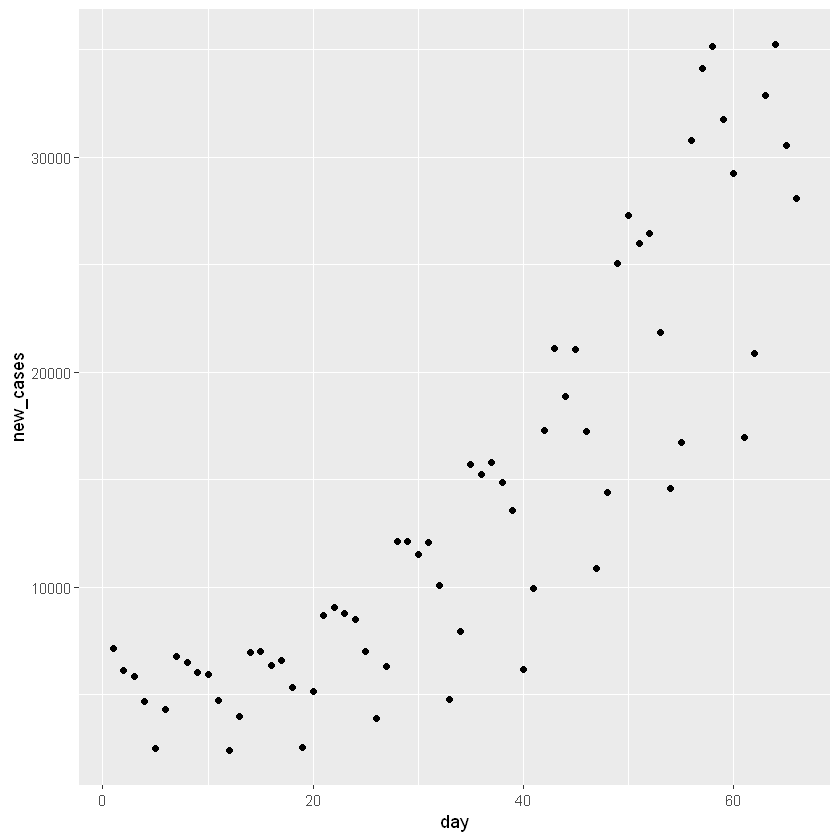

In [23]:
plot_w3 <- ggplot(wave_3, aes(x = day, y = new_cases)) + geom_point()
plot_w3

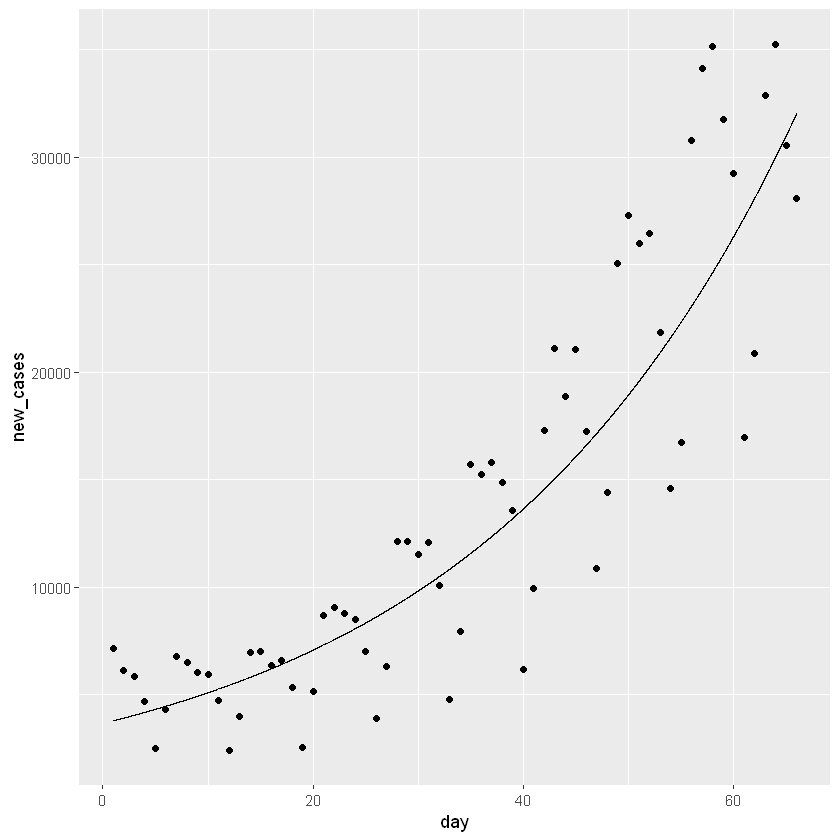

In [24]:
fit <- lm(log(new_cases) ~ day, data=wave_3)
sample <- data.frame(day = seq(1, 66, 0.01))
sample$new_cases <- predict(fit, sample)
plot_w3 <- plot_w3 + geom_line(data=sample, aes(day, exp(new_cases)))
plot_w3

In [25]:
wave_4 <- data %>% filter(day > 546) %>% filter(day < 639)
wave_4$day <- wave_4$day - 546
wave_4

day,location,date,new_cases
1,Poland,2021-09-01,366
2,Poland,2021-09-02,376
3,Poland,2021-09-03,361
4,Poland,2021-09-04,388
5,Poland,2021-09-05,323
6,Poland,2021-09-06,182
7,Poland,2021-09-07,405
8,Poland,2021-09-08,531
9,Poland,2021-09-09,511
10,Poland,2021-09-10,529


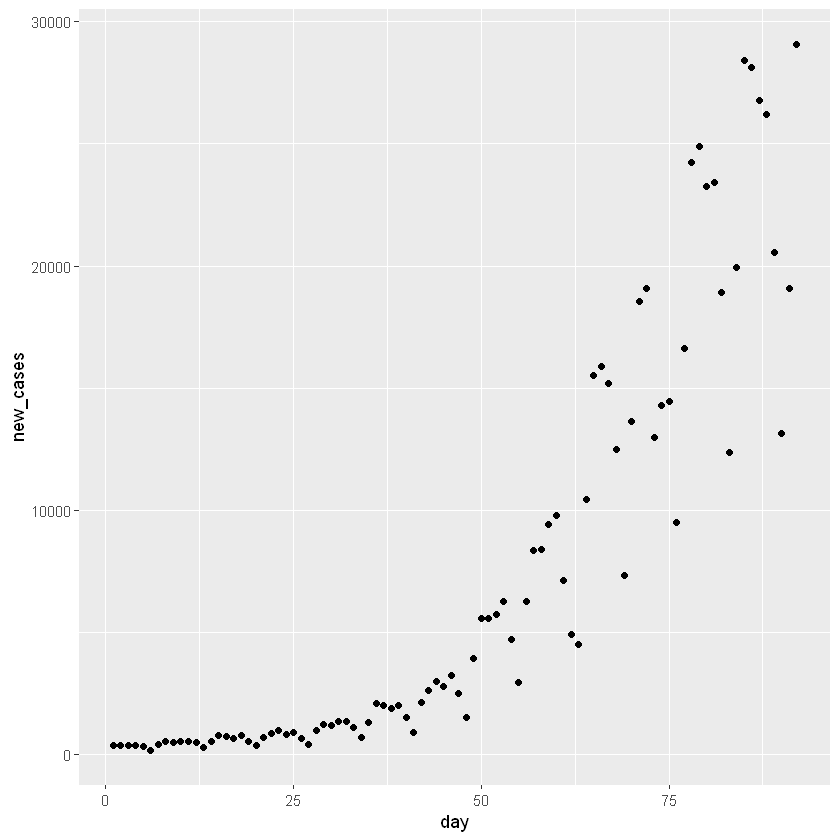

In [26]:
plot_w4 <- ggplot(wave_4, aes(x = day, y = new_cases)) + geom_point()
plot_w4

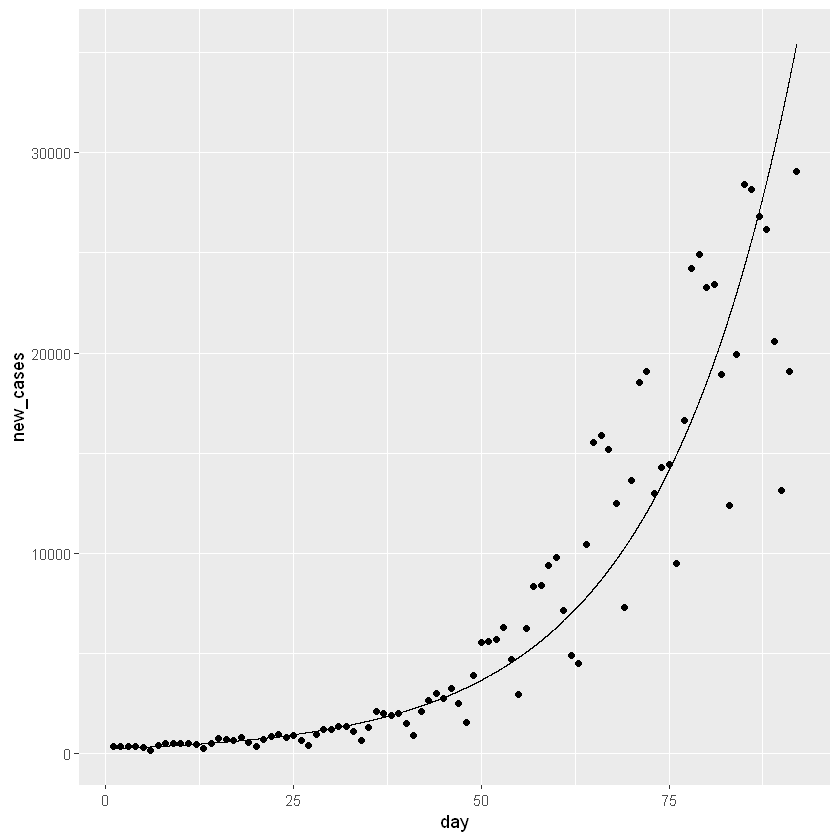

In [27]:
fit <- lm(log(new_cases) ~ day, data=wave_4)
sample <- data.frame(day = seq(1, 92, 0.01))
sample$new_cases <- predict(fit, sample)
plot_w4 <- plot_w4 + geom_line(data=sample, aes(day, exp(new_cases)))
plot_w4

In [28]:
wave_5 <- data %>% filter(day > 669) %>% filter(day < 703)
wave_5$day <- wave_5$day - 669
wave_5

day,location,date,new_cases
1,Poland,2022-01-02,7180
2,Poland,2022-01-03,6423
3,Poland,2022-01-04,11667
4,Poland,2022-01-05,17197
5,Poland,2022-01-06,16577
6,Poland,2022-01-07,11901
7,Poland,2022-01-08,10897
8,Poland,2022-01-09,11107
9,Poland,2022-01-10,7787
10,Poland,2022-01-11,11402


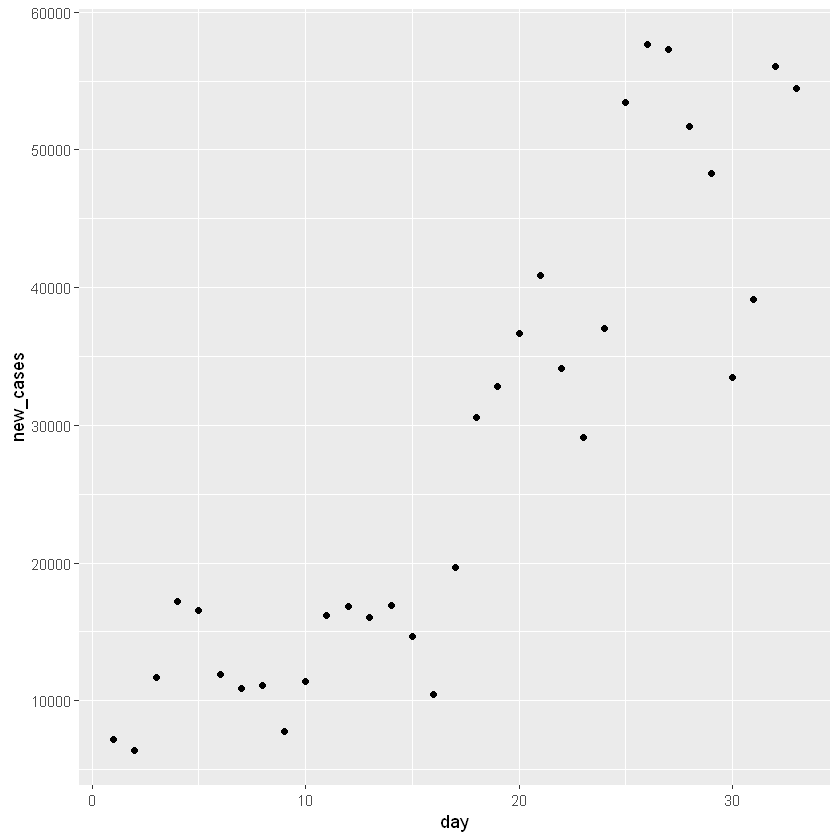

In [29]:
plot_w5 <- ggplot(wave_5, aes(x = day, y = new_cases)) + geom_point()
plot_w5

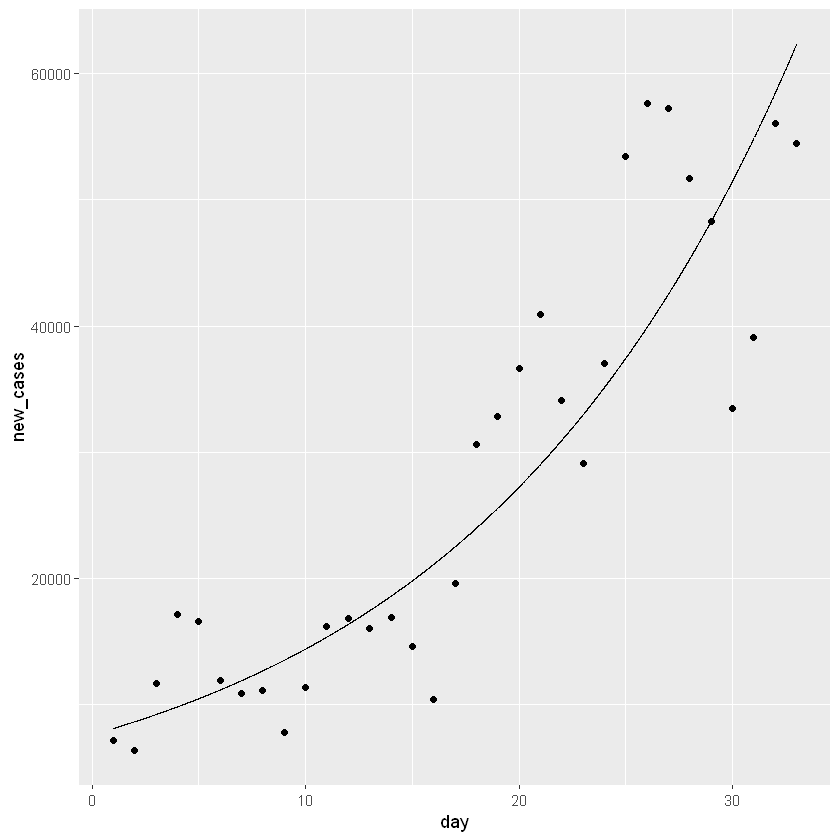

In [30]:
fit <- lm(log(new_cases) ~ day, data=wave_5)
sample <- data.frame(day = seq(1, 33, 0.01))
sample$new_cases <- predict(fit, sample)
plot_w5 <- plot_w5 + geom_line(data=sample, aes(day, exp(new_cases)))
plot_w5